# Wind Data From NREL's WIND Toolkit
---
The **Techno-Economic WIND (Wind Integration National Dataset) Toolkit** (https://www.nrel.gov/grid/wind-toolkit.html) provides 5-min resolution data for 7 years, ranging from 2007 to 2013, at 120,000 points within the continental U.S. selected for their wind resource. This set contains power estimates and forecasts along with a subset of atmospheric variables. Data can be accessed via an API(https://developer.nrel.gov/docs/wind/wind-toolkit/).

In [1]:
from prereise.gather.winddata.te_wind import te_wind

## 1. Extract Site
Out of the 120,000 sites proposed by NREL get the those within the Washington state

In [2]:
site  = te_wind.get_nrel_site(['WA'])

Retrieving nrel sites for WA
Got 1642 sites in WA


In [3]:
site.head()

,site_id,lat,lon,capacity,capacity_factor
0,121076,46.342697,-117.367416,16.0,0.316
1,121077,46.347599,-117.341385,16.0,0.289
2,121180,46.345894,-117.452621,10.0,0.376
3,121181,46.350815,-117.426590,14.0,0.376
4,121182,46.355736,-117.400574,16.0,0.351


## 2. Extract Wind Farms
Load Western interconnection and get wind farms in Washington state.

In [4]:
from powersimdata.input.grid import Grid

grid = Grid(['Western'])
wind_farm = grid.plant.groupby('type').get_group('wind')

--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


In [5]:
wind_farm.head()

,bus_id,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,mu_Qmax,mu_Qmin,GenMWMax,GenMWMin,type,interconnect,lat,lon,zone_id,zone_name
10397,2010691,59.72,21.07,21.07,-14.24,1.0061,98.92,1,59.72,59.72,...,0.0,0.0,98.900002,16.648942,wind,Western,45.813100,-120.347500,201,Washington
10400,2010699,79.42,-14.50,21.45,-14.50,1.0019,120.64,1,79.42,79.42,...,0.0,0.0,100.699997,13.150001,wind,Western,47.135600,-120.687200,201,Washington
10401,2010703,136.30,29.03,29.03,-19.63,1.0623,174.64,1,136.30,136.30,...,0.0,0.0,136.300004,43.062568,wind,Western,45.879700,-120.807200,201,Washington
10428,2010746,66.35,-12.96,19.17,-12.96,1.0205,98.26,1,66.35,66.35,...,0.0,0.0,89.999998,19.930001,wind,Western,46.954700,-120.181900,201,Washington
10442,2010768,212.51,56.83,56.83,-38.42,1.0299,301.55,1,212.51,212.51,...,0.0,0.0,266.799998,122.148347,wind,Western,46.421111,-118.026944,201,Washington


## 3. Find Closest NREL Site to Wind Farm

In [6]:
closest_site = te_wind.site2farm(site, wind_farm[['lat','lon']])

100%|██████████| 243/243 [00:09<00:00, 24.64it/s]


In [7]:
closest_site.head()

,site_id,capacity,dist
plant_id,,,
10397,121408,16.0,27.069415
10400,125504,14.0,59.431869
10401,121930,16.0,224.840205
10428,124942,16.0,64.160009
10442,122079,10.0,289.906536


## 4. Define Date Range

In [8]:
start_date = te_wind.pd.Timestamp('2010-01-01')
end_date = te_wind.pd.Timestamp('2010-01-01 23:55:00')
date_range = te_wind.pd.date_range(start_date, end_date, freq = '5min')

## 5. Retrieve Data from NREL Server

In [9]:
%%capture
# suppress output because it is only suitable as terminal output

data = te_wind.get_data(closest_site, date_range);

In [10]:
import pprint
pprint.pprint(data)

{'2010-01': {119823:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  1.000000    0.815785
2010-01-01 00:05:00+00:00  1.000000    0.819790
2010-01-01 00:10:00+00:00  1.000000    0.830090
2010-01-01 00:15:00+00:00  1.000000    0.839434
2010-01-01 00:20:00+00:00  1.000000    0.844965
2010-01-01 00:25:00+00:00  1.000000    0.843630
2010-01-01 00:30:00+00:00  1.000000    0.837526
2010-01-01 00:35:00+00:00  1.000000    0.830469
2010-01-01 00:40:00+00:00  1.000000    0.826274
2010-01-01 00:45:00+00:00  1.000000    0.827800
2010-01-01 00:50:00+00:00  1.000000    0.844967
2010-01-01 00:55:00+00:00  1.000000    0.863277
2010-01-01 01:00:00+00:00  1.000000    0.876628
2010-01-01 01:05:00+00:00  1.000000    0.892077
2010-01-01 01:10:00+00:00  1.000000    0.901996
2010-01-01 01:15:00+00:00  1.000000    0.913059
2010-01-01 01:20:00+00:00  1.000000    0.923740
2010-01-01 01:25:00+00:00  1.000000    0.927936
2010-01-01 01:30:00

[288 rows x 2 columns],
             126130:                               power  wind_speed
datetime                                       
2010-01-01 00:00:00+00:00  0.377418    0.455868
2010-01-01 00:05:00+00:00  0.411185    0.469976
2010-01-01 00:10:00+00:00  0.433571    0.477795
2010-01-01 00:15:00+00:00  0.450444    0.483706
2010-01-01 00:20:00+00:00  0.441514    0.480656
2010-01-01 00:25:00+00:00  0.453485    0.484855
2010-01-01 00:30:00+00:00  0.461669    0.487716
2010-01-01 00:35:00+00:00  0.454417    0.485233
2010-01-01 00:40:00+00:00  0.402361    0.467115
2010-01-01 00:45:00+00:00  0.399076    0.465781
2010-01-01 00:50:00+00:00  0.379231    0.457203
2010-01-01 00:55:00+00:00  0.316276    0.429742
2010-01-01 01:00:00+00:00  0.253805    0.402472
2010-01-01 01:05:00+00:00  0.244321    0.397515
2010-01-01 01:10:00+00:00  0.267740    0.408768
2010-01-01 01:15:00+00:00  0.306755    0.425931
2010-01-01 01:20:00+00:00  0.311916    0.428218
2010-01-01 01:25:00+00:00  0.279771    0.41

## 6. Get Normalized Power Output Profile

In [11]:
%%capture
# suppress output because it is only suitable as terminal output

[power, wind_speed] = te_wind.dict2frame(data, date_range, closest_site)

In [12]:
power.head()

site_id,121408,125504,121930,124942,122079,124075,121405,121700,121765,121471,...,126548,126288,126515,126525,126504,126496,126488,126566,124440,126518
2010-01-01 00:00:00,0.003987,0.400584,0.0,0.032172,0.229368,0.242962,0.0,0.081190,0.172802,0.002936,...,0.807178,0.390711,0.982108,1.0,0.610969,1.0,0.002729,1.0,1.000000,0.583700
2010-01-01 00:05:00,0.002920,0.380317,0.0,0.031004,0.302882,0.291673,0.0,0.089027,0.176255,0.002068,...,0.819476,0.370000,0.987362,1.0,0.592443,1.0,0.003152,1.0,0.995309,0.683376
2010-01-01 00:10:00,0.003999,0.366210,0.0,0.034504,0.343416,0.296052,0.0,0.096500,0.172483,0.000914,...,0.820964,0.367857,0.987889,1.0,0.598825,1.0,0.003757,1.0,0.981538,0.708765
2010-01-01 00:15:00,0.005006,0.361330,0.0,0.040765,0.364482,0.313762,0.0,0.107642,0.197135,0.001349,...,0.781127,0.398960,0.984992,1.0,0.598059,1.0,0.004361,1.0,0.984233,0.674218
2010-01-01 00:20:00,0.003808,0.352501,0.0,0.044649,0.374238,0.362066,0.0,0.142644,0.237211,0.001622,...,0.724059,0.422809,0.988706,1.0,0.629280,1.0,0.004512,1.0,0.993323,0.661484


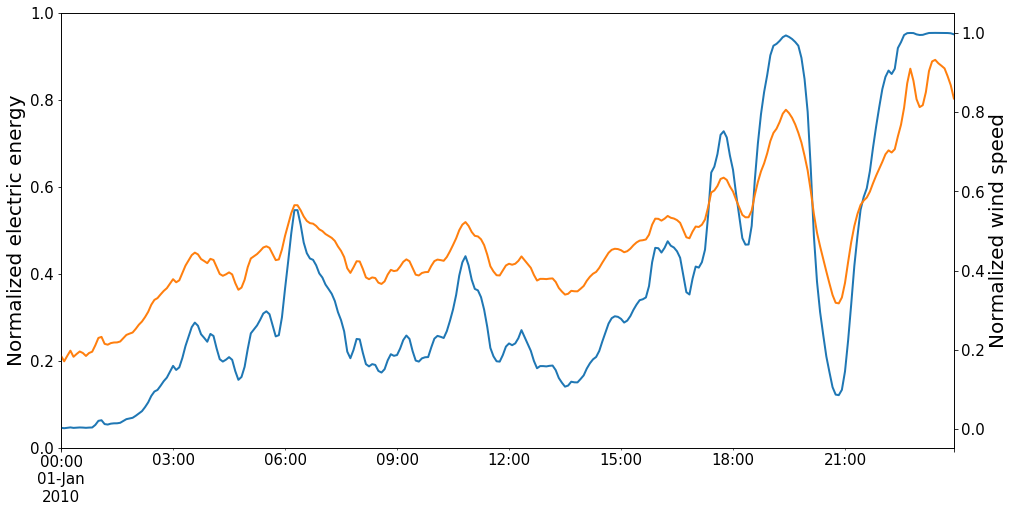

In [13]:
from matplotlib import pyplot

fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
ax_twin = ax.twinx()

power[121408].plot(ax=ax_twin, legend=False, lw=2)
ax.tick_params(which='both', labelsize=15)
ax.set_xlabel('')
ax.set_ylabel('Normalized electric energy', fontsize=20)
wind_speed[121408].plot(ax=ax_twin, legend=False, lw=2)
ax_twin.tick_params(which='both', labelsize=15)
ax_twin.set_ylabel('Normalized wind speed', fontsize=20)

pyplot.show()

## 7. Get Power Output Profile

In [14]:
profile = te_wind.get_profile(power, wind_farm, closest_site)

In [15]:
profile.head()

,10397,10400,10401,10428,10442,10458,10463,10475,10522,10541,...,12781,12794,12795,12796,12810,12811,12821,12822,12851,12853
2010-01-01 00:00:00,0.478303,33.605445,0.0,3.341240,95.509883,30.770337,0.048025,22.969752,11.226378,0.043073,...,0.246276,106.500006,9.7,9.6,8.996837,9.996485,9.770529,9.770529,103.499997,138.255174
2010-01-01 01:00:00,1.943735,24.206566,0.0,4.645477,19.361727,34.725381,1.985658,27.438406,8.323553,0.000000,...,0.614102,106.500006,9.7,9.6,8.893553,9.881726,9.862698,9.862698,103.499997,178.046884
2010-01-01 02:00:00,8.503778,9.466036,0.0,3.837972,0.251889,53.729526,9.098427,26.663486,7.206191,0.060599,...,1.001003,106.066263,9.7,9.6,7.956605,8.840672,9.991620,9.991620,103.078472,167.419555
2010-01-01 03:00:00,21.194265,5.843719,0.0,3.731842,6.220193,61.184579,16.667660,48.538608,10.290147,0.489429,...,2.283144,103.705160,9.7,9.6,7.513870,8.348744,10.000000,10.000000,100.783879,187.220803
2010-01-01 04:00:00,17.505488,2.463715,0.0,3.407813,25.407308,56.334383,17.816369,38.847648,9.722603,0.735519,...,3.198927,101.024063,9.7,9.6,8.655024,9.616694,10.000000,10.000000,98.178307,188.999999


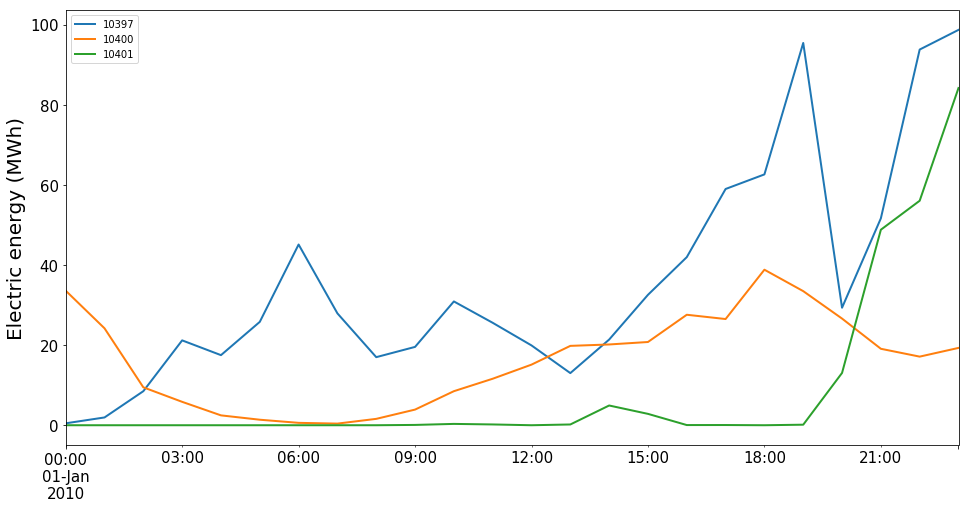

In [16]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()

profile[[10397, 10400, 10401]].plot(ax=ax, legend=True, lw=2, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Electric energy (MWh)', fontsize=20)
pyplot.show()